In [1]:
import numpy as np

def strassen(A, B):
    # Check if the matrices are single elements, if so, return the product
    if len(A) == 1:
        return A * B
    
    # Splitting the matrices into four quadrants
    mid = len(A) // 2
    A11, A12 = A[:mid, :mid], A[:mid, mid:]
    A21, A22 = A[mid:, :mid], A[mid:, mid:]
    B11, B12 = B[:mid, :mid], B[:mid, mid:]
    B21, B22 = B[mid:, :mid], B[mid:, mid:]
    
    # Recursively computing the seven products of the submatrices
    P1 = strassen(A11 + A22, B11 + B22)
    P2 = strassen(A21 + A22, B11)
    P3 = strassen(A11, B12 - B22)
    P4 = strassen(A22, B21 - B11)
    P5 = strassen(A11 + A12, B22)
    P6 = strassen(A21 - A11, B11 + B12)
    P7 = strassen(A12 - A22, B21 + B22)
    
    # Computing the four quadrants of the product matrix
    C11 = P1 + P4 - P5 + P7
    C12 = P3 + P5
    C21 = P2 + P4
    C22 = P1 - P2 + P3 + P6
    
    # Combining the quadrants to form the final product matrix
    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    
    return C


In [2]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

C = strassen(A, B)

print(C)


[[19 22]
 [43 50]]


Empirical testing 

In [13]:
import time
import numpy as np
import matplotlib.pyplot as plt

def standard_mult(A, B):
    n = A.shape[0]
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    return C

def time_mult(algo, A, B):
    start = time.time()
    C = algo(A, B)
    end = time.time()
    return end - start

def test(algo):
    sizes = [2**i for i in range(1, 9)] # test matrices of size 2^1 to 2^10
    times = []
    for n in sizes:
        A = np.random.rand(n, n)
        B = np.random.rand(n, n)
        t = time_mult(algo, A, B)
        times.append(t)
    # plot the results
    plt.plot(sizes, times, label=algo.__name__)
    plt.xlabel('Matrix size')
    plt.ylabel('Runtime (s)')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()


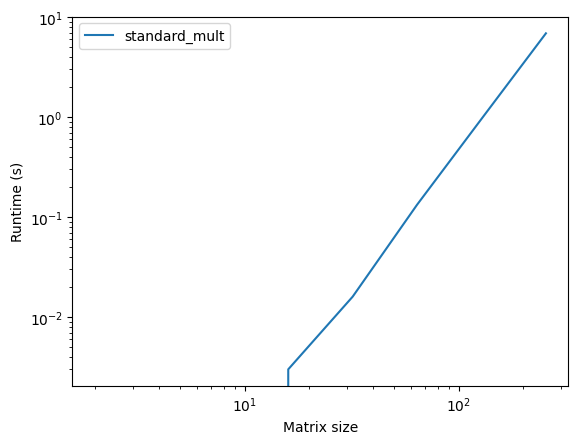

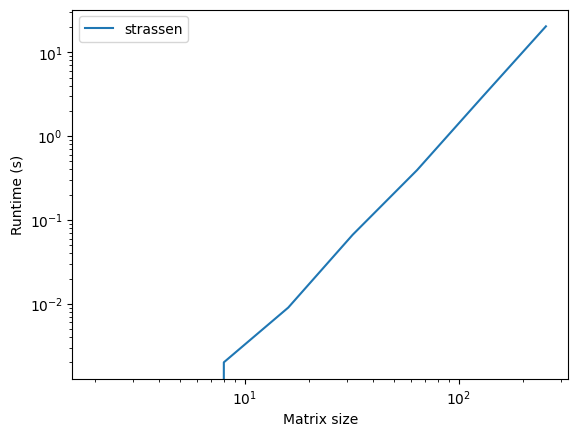

In [14]:
test(standard_mult)
test(strassen)


In [4]:
import numpy as np
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

C = matrix_multiplication(A, B)
def matrix_multiplication(A, B):
    m = len(A)
    n = len(B)
    p = len(B[0])
    C = [[0 for j in range(p)] for i in range(m)]
    
    for i in range(m):
        for j in range(p):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]
    
    return C
print(C)

[[19, 22], [43, 50]]
